# Linear Regression


In [1]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [2]:
# Load dataset
data = np.loadtxt('ex1data.txt', delimiter=',')
X = data[:, 0]
Y = data[:, 1]
m = Y.size
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

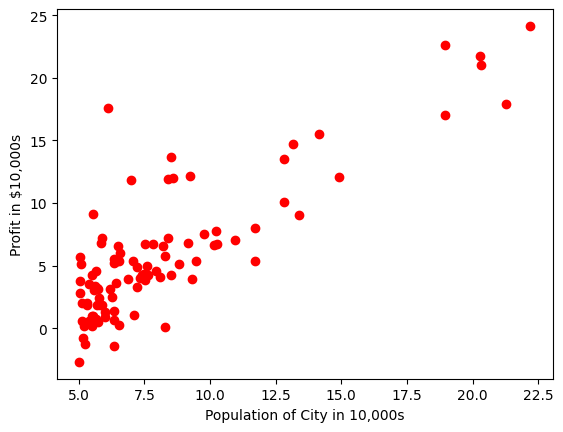

In [3]:
# plot dataset
pyplot.scatter(X, Y, marker='o', c='r')
pyplot.xlabel('Population of City in 10,000s')
pyplot.ylabel('Profit in $10,000s')
pyplot.show()

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [4]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.

    Arguments
    ---------
    x : float
        The input sample.

    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    Returns
    -------
    h_x : float
        The hypothesis for input sample.

    Hint(s)
    -------
    Compute equation (ii).
    '''
    # code here
    h_x = theta0 + theta1 * x
    return h_x

    # You need to return the following variable(s) correctly


    ### START CODE HERE ### (≈ 1 line of code)

    ### END CODE HERE ###



Execute the next cell to verify your implementation.

In [5]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [6]:

def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.

    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.

    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.

    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    Returns
    -------
    J : float
        The value of the regression cost function.

    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    # number of training examples
    m=len(Y)

    # You need to return the following variable(s) correctly

    ### START CODE HERE ### (≈ 3-4 lines of code)
    J=0
    for i in range(m):
      h_x= predict(X[i], theta0, theta1)
      J += (h_x - Y[i]) ** 2
      J=J/(2*m)

    return J



    ### END CODE HERE ###

   # code here

Execute the next cell to verify your implementation.

In [7]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 0.18
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch).

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [8]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.

    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.

    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.

    alpha : float
        The learning rate.

    n_epoch : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    J : list
        A python list for the values of the cost function after each iteration.

    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of
    the cost function (computeCost) here.
    """
    # initialize some useful values
    # number of training examples
    # list to store cost

    # You need to return the following variables correctly


    # code here


        ### START CODE HERE ### (≈ 5-10 lines of code)
        # code here


        ### END CODE HERE ###

        # code here
   # Initialize parameters
    theta0 = 0.0
    theta1 = 0.0

    # Number of training examples
    m = len(Y)

    # List to store the cost after each iteration
    J_history = []

    for epoch in range(n_epoch):
        # Initialize the gradients
        sum_errors0 = 0.0
        sum_errors1 = 0.0

        # Loop through each training example
        for i in range(m):
            h_x = predict(X[i], theta0, theta1)  # Calculate the hypothesis
            error = h_x - Y[i]  # Calculate the error

            # Accumulate the gradients
            sum_errors0 += error
            sum_errors1 += error * X[i]

        # Update the parameters
        theta0 = theta0 - (alpha / m) * sum_errors0
        theta1 = theta1 - (alpha / m) * sum_errors1

        # Compute the cost and store it in the history list
        cost = computeCost(X, Y, theta0, theta1)
        J_history.append(cost)

        # Optional: print cost to monitor convergence
        # print(f"Epoch {epoch+1}/{n_epoch}, Cost: {cost}, theta0: {theta0}, theta1: {theta1}")

    return theta0, theta1, J_history



Execute the next cell to verify your implementation.

In [9]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 0.0228
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

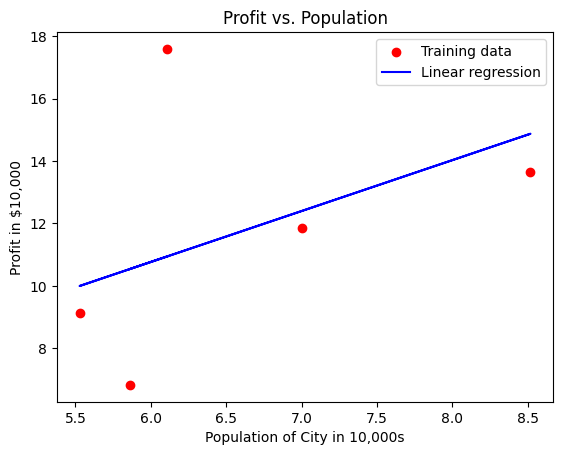

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plotLinearFit(X, Y, theta0, theta1):
    """
    Plots the linear fit using the learned parameters theta0 and theta1.

    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.

    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.

    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.
    """
    # Plot the original data points
    plt.scatter(X, Y, color='red', marker='o', label='Training data')

    # Compute the predicted values using the learned parameters
    y_pred = theta0 + theta1 * X

    # Plot the linear fit
    plt.plot(X, y_pred, color='blue', label='Linear regression')

    # Add labels and title
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000')
    plt.title('Profit vs. Population')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

# Example usage:
# Assuming you have already performed gradient descent and have learned theta0 and theta1
X = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])  # Example input data
Y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233])  # Example output data
alpha = 0.01
n_epoch = 1000

# Perform gradient descent to get the learned parameters
theta0, theta1, J_history = gradientDescent(X, Y, alpha, n_epoch)

# Plot the linear fit
plotLinearFit(X, Y, theta0, theta1)


### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [11]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $75007.24
For population = 65,000, predicted profit = $115797.23


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately.

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [12]:
import numpy as np

# Load data
train_X = np.loadtxt('ex2traindata.txt')
train_Y = np.loadtxt('ex2trainlabels.txt')
test_X = np.loadtxt('ex2testdata.txt')
test_Y = np.loadtxt('ex2testlabels.txt')

# Feature normalization
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Add a bias term to the features (x0)
def add_bias_term(X):
    m = X.shape[0]  # number of examples
    X_bias = np.hstack([np.ones((m, 1)), X])
    return X_bias

# Normalize the features
train_X_norm, mu, sigma = normalize_features(train_X)
test_X_norm = (test_X - mu) / sigma  # Normalize test features using the same mean and std

# Add bias term
train_X_bias = add_bias_term(train_X_norm)
test_X_bias = add_bias_term(test_X_norm)

# Proceed with multivariate linear regression model implementation


In [14]:

# Hypothesis function for multivariate linear regression
def hypothesis(theta, X):
  return np.dot(X, theta)


# Cost function (mean squared error)
  def cost_function(theta, X, y):
     m = len(y)  # Number of training examples
     predictions = hypothesis(theta, X)
     cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
     return cost

 # Gradient descent for multivariate linear regression
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(num_iterations)  # To store the cost at each iteration

    for i in range(num_iterations):
        predictions = hypothesis(theta, X)
        theta = theta - (alpha / m) * np.dot(X.T, (predictions - y))
        cost_history[i] = cost_function(theta, X, y)  # Store the cost

    return theta, cost_history



In [37]:
import numpy as np

# Hypothesis function for multivariate linear regression
def hypothesis(theta, X):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost_function(theta, X, y):
    m = len(y)  # Number of training examples
    predictions = hypothesis(theta, X)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient descent for multivariate linear regression
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(num_iterations)  # To store the cost at each iteration

    for i in range(num_iterations):
        predictions = hypothesis(theta, X)
        theta = theta - (alpha / m) * np.dot(X.T, (predictions - y))
        cost_history[i] = cost_function(theta, X, y)  # Store the cost

    return theta, cost_history

# Assuming X_train, y_train, X_test, y_test are already defined
# Initialize theta with zeros
theta = np.zeros(train_X.shape[1])

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model
theta_final, cost_history = gradient_descent(train_X, train_Y, theta, learning_rate, num_iterations)

# Test the model on the test set
y_pred = hypothesis(theta_final, test_X)
test_cost = cost_function(theta_final, test_X, train_Y)

print("Test Mean Squared Error:", test_cost)


<ipython-input-37-f4df753d8bd1>:11: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)


ValueError: operands could not be broadcast together with shapes (102,) (404,) 

## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [27]:
# Define a list of alpha values to try
alphas = [0.1, 1, 10, 100, 1000]

In [36]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Train a Linear Regression model
# lin_reg = LinearRegression()
# lin_reg.fit(train_X,train_Y)

# # Predict and evaluate
# y_pred = lin_reg.predict(test)
# lin_mse = mean_squared_error(y_test, y_pred)
# print(f"Linear Regression MSE: {lin_mse}")

In [34]:
from sklearn.linear_model import Ridge

# Store results
ridge_mse = []
ridge_coefs = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(train_X, train)
    y_pred = ridge_reg.predict(X_test)
    ridge_mse.append(mean_squared_error(test_Y, y_pred))
    ridge_coefs.append(ridge_reg.coef_)

print("Ridge Regression MSEs:", ridge_mse)


NameError: name 'train' is not defined